<a href="https://colab.research.google.com/github/MinhVuong2000/Data-Science/blob/master/Boston_Marathon_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#State the Problem
There is a lot of information on [runners and their performance for the
Boston Marathon](https://github.com/llimllib/bostonmarathon). Pick a year (post-2012 has more info) and do some clustering. Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:
1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).
2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.
3. Do the same things as above for finishing time (which group runs
fastest).

# Introduce

In [ ]:
!import file from kaggle
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d minhvuong2000/boston-marathon
!ls

/bin/bash: import: command not found


Saving kaggle.json to kaggle.json
  0% 0.00/3.43M [00:00<?, ?B/s]
100% 3.43M/3.43M [00:00<00:00, 114MB/s]
boston-marathon.zip  kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('boston-marathon.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
!ls files

results_2012.csv  results_2013.csv  results_2014.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
data = pd.read_csv("files/results_2014.csv")
data.shape

(31984, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  object 
 4   gender     31984 non-null  object 
 5   age        31984 non-null  int64  
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31984 non-null  object 
 11  overall    31984 non-null  int64  
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31984 non-null  object 
 15  5k         31984 non-null  object 
 16  half       31984 non-null  object 
 17  20k        31984 non-null  object 
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

### Pretreatment data

We change columns has type is numeric categories into numeric

In [ ]:
data['gender'] = data['gender'].str.replace('M','0')
data['gender'] = data['gender'].str.replace('F','1')
numeric = ['10k','25k','age','official','35k','gender','overall','pace','30k','5k','half','20k','40k']
data[numeric] = data[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31934 non-null  float64
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31768 non-null  float64
 4   gender     31984 non-null  float64
 5   age        31984 non-null  float64
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31950 non-null  float64
 11  overall    31984 non-null  float64
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31944 non-null  float64
 15  5k         31932 non-null  float64
 16  half       31912 non-null  float64
 17  20k        31933 non-null  float64
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

In this data, there is column its name is 'ctz' have many null data (only 757/16164 not null), and others is good. <br>
So I will drop this column, and change 1 cell in city to become all not-null data

In [ ]:
#drop column
data = data.drop(columns = ['ctz'],axis = 1)
#change null into not-null
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  float64
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  float64
 4   gender     31984 non-null  float64
 5   age        31984 non-null  float64
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   35k        31984 non-null  float64
 10  overall    31984 non-null  float64
 11  pace       31984 non-null  float64
 12  state      31984 non-null  object 
 13  30k        31984 non-null  float64
 14  5k         31984 non-null  float64
 15  half       31984 non-null  float64
 16  20k        31984 non-null  float64
 17  country    31984 non-null  object 
 18  city       31984 non-null  object 
 19  40k        31984 non-null  float64
dtypes: flo

In [ ]:
data.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47.0,85.25,W1,8,71.40,8.0,3.27,0,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33.0,138.95,F1,1,116.37,21.0,5.30,0,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41.0,80.60,W2,1,67.42,1.0,3.08,0,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24.0,140.58,F2,3,116.37,27.0,5.37,0,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40.0,81.23,W3,2,67.83,2.0,3.10,0,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


# Explore data

In [ ]:
data.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.718298,1932.563032,132.709723,0.449193,42.407079,242.997314,8051.044741,196.648339,15939.587825,9.275658,164.365402,25.713685,111.413195,105.543107,228.722255
std,9.189281,1715.228694,27.758446,0.497420,11.316496,52.300431,4754.005626,42.444377,9232.978224,1.992486,34.427329,4.447068,21.692902,20.209809,49.775681
min,0.000000,1.000000,0.000000,0.000000,18.000000,80.600000,1.000000,0.000000,1.000000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.370000,610.000000,115.100000,0.000000,33.000000,205.527500,3972.000000,167.050000,7943.750000,7.850000,140.580000,22.630000,96.750000,91.700000,193.700000
50%,50.320000,1425.000000,128.670000,0.000000,42.000000,232.370000,7970.000000,188.120000,15939.500000,8.870000,157.700000,25.080000,107.775000,102.100000,218.780000
75%,57.150000,2611.000000,147.555000,1.000000,50.000000,273.235000,11968.000000,220.120000,23935.250000,10.430000,182.785000,28.455000,123.030000,116.480000,257.405000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

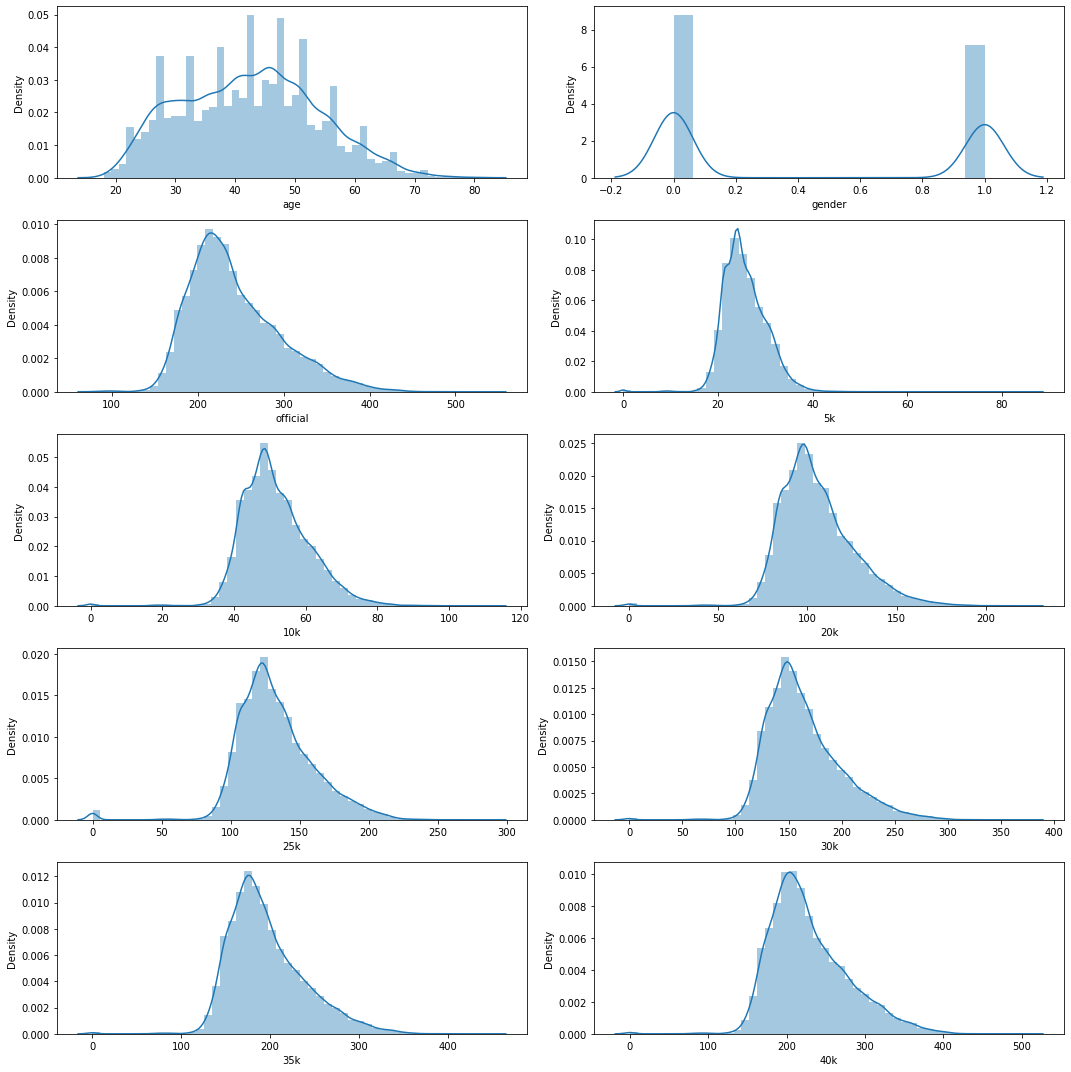

In [165]:
plot_column_overview = ['age','gender','official','5k','10k','20k','25k','30k','35k','40k']
fig,ax = plt.subplots(5,2, figsize=(15,15)) 
i=0 
for x in range(5):
    for y in range(2):
        sns.distplot(data[plot_column_overview[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

In [ ]:
def drawBarChart(column, typeChoice, title, ylabel):
  df = data[column].groupby(pd.cut(data['age'], [18,25,40,60,81])).aggregate(typeChoice)
  ax = df.plot(kind="bar", title=title,ylabel=ylabel)
  for idx, label in enumerate(list(df.index)): 
            value = np.round(df[idx],decimals=2)
            ax.annotate(value,(idx, value),xytext=(0, 5), textcoords='offset points')

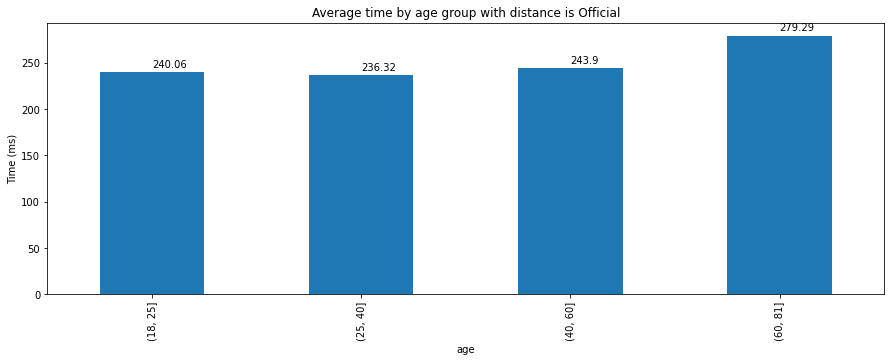

In [ ]:
drawBarChart('official',np.average,"Average time by age group with distance is Official","Time (ms)")

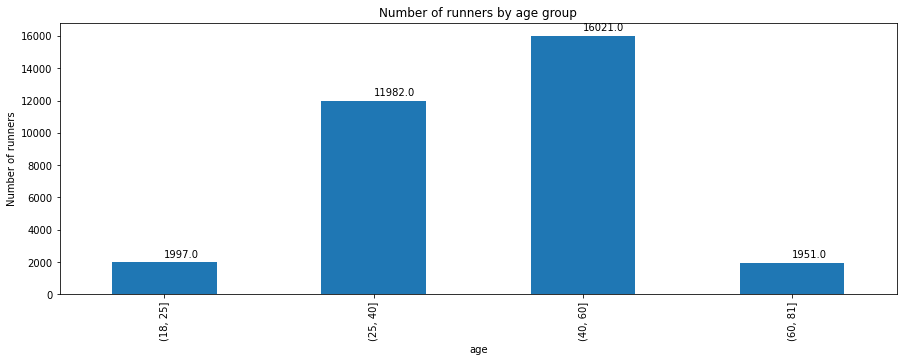

In [ ]:
drawBarChart('official',len,"Number of runners by age group","Number of runners")

From 2 chart, number of people take part in Boston Marathon in age group (40,60] is the most, but average is age group (25,40] is fastest

In [ ]:
print(data['gender'].value_counts())

0.0    17617
1.0    14367
Name: gender, dtype: int64


        age  male  female
0  (18, 25]   768    1229
1  (25, 40]  5682    6300
2  (40, 60]  9588    6433
3  (60, 81]  1558     393


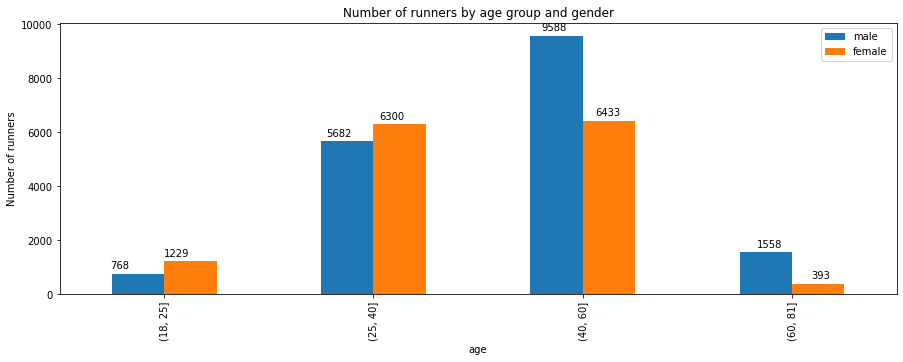

In [111]:
df = data['official'].groupby([pd.cut(data['age'], [18,25,40,60,81]),data['gender']]).size().reset_index(name='count')
df = pd.DataFrame(df)
age = df.age.unique().tolist()
official_female=[]
official_male=[]
for value in df.index:
  if df['gender'][value] ==1:
    official_female.append(df['count'][value])
  else:
    official_male.append(df['count'][value])
df = [{'age': age, 'male': male, 'female': female} for age,male,female in zip(age,official_male,official_female)]
df = pd.DataFrame(df)
print(df)
ax = df.plot(kind="bar", title="Number of runners by age group and gender",ylabel="Number of runners",x='age')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.03, p.get_height()), xytext=(0, 5), textcoords='offset points')

Can see that, number of runner has gender is Male is more and more followed age. And in age group from 41 to 60, they join so many, specially Male, while in age group (60,81] female is few, different to male.

# Apply models

Because need cluster for age and gender, so we drop column has type category 

In [ ]:
data_k = data.drop([x for x in data.columns if data[x].dtype=="object"],axis=1)
data.dtypes

10k          float64
division       int64
25k          float64
gender       float64
age          float64
official     float64
genderdiv      int64
35k          float64
overall      float64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
40k          float64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


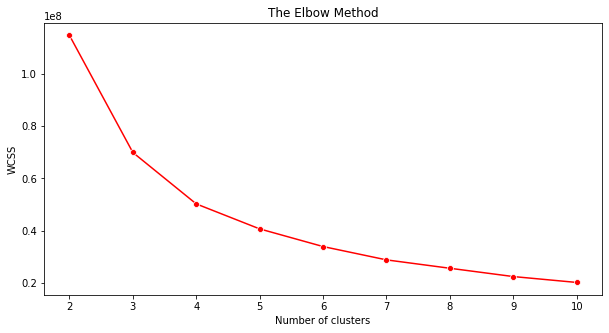

In [82]:
from collections import Counter

wcss = []
for i in range(2, 11):
    X = data[['age','official','5k','10k','20k','25k','30k','35k','40k','gender']].values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<class 'numpy.ndarray'>
Counter({4: 10738, 2: 7193, 0: 6798, 1: 4982, 3: 2273})


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

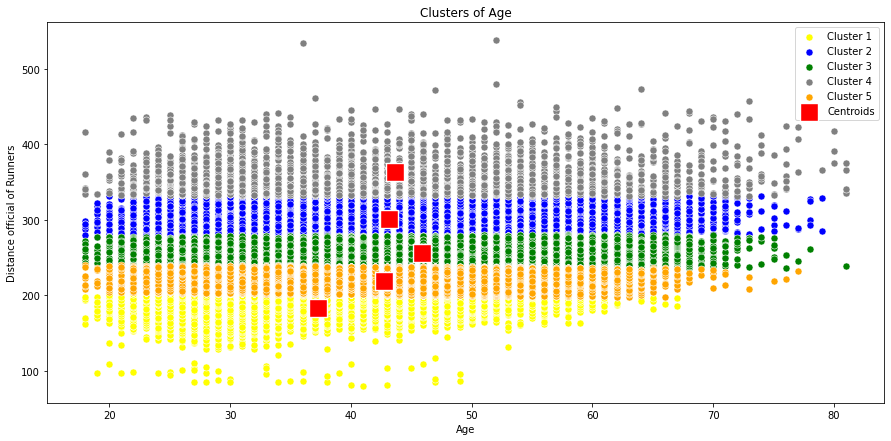

In [102]:
X = data[['age','official']].values#,'5k','10k','20k','25k','30k','35k','40k','gender'
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(type(y_kmeans))
print(Counter(y_kmeans))

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Age')
plt.xlabel('Age')
plt.ylabel('Distance official of Runners')
plt.legend()
plt.show()

Cluster 4 is people run most

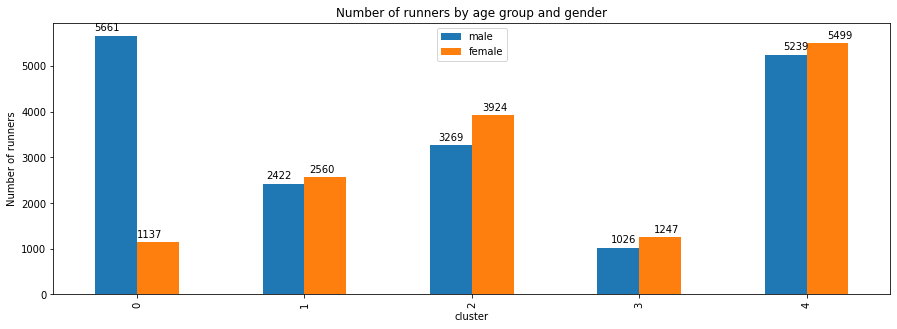

In [118]:
data_cluster_age = data['official'].groupby([y_kmeans,data['gender']]).size().reset_index(name='count').rename(columns={'level_0':'cluster'})
data_cluster_age = pd.DataFrame(data_cluster_age)
cluster = data_cluster_age.cluster.unique().tolist()
official_female=[]
official_male=[]
for value in data_cluster_age.index:
  if data_cluster_age['gender'][value] ==1:
    official_female.append(data_cluster_age['count'][value])
  else:
    official_male.append(data_cluster_age['count'][value])
data_cluster_age = [{'cluster': cluster, 'male': male, 'female': female} for cluster,male,female in zip(cluster,official_male,official_female)]
data_cluster_age = pd.DataFrame(data_cluster_age)
ax = data_cluster_age.plot(kind="bar", title="Number of runners by cluster and gender",ylabel="Number of runners",x='cluster')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.03, p.get_height()), xytext=(0, 5), textcoords='offset points')


From chart, male having least official almost is male, and the most have number of female is a little high than

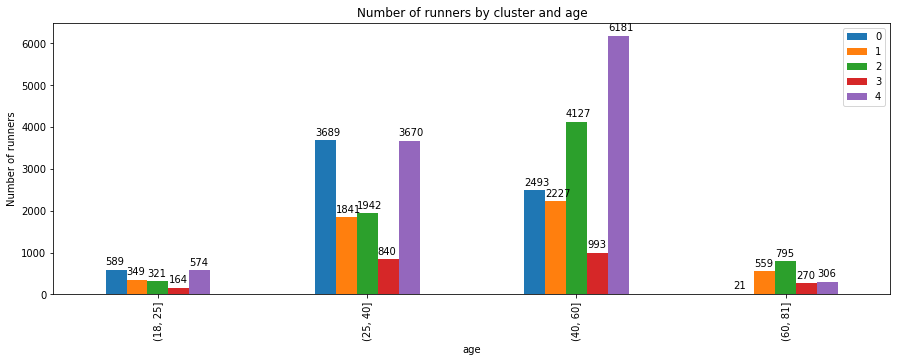

In [163]:
df_new = data['official'].groupby([y_kmeans,pd.cut(data['age'], [18,25,40,60,81])]).size().reset_index(name='count').rename(columns={'level_0':'cluster'})
#print(df_new)
age = df_new.age.unique().tolist()
cluster = df_new.cluster.unique().tolist()
df = pd.DataFrame(columns=age,index=cluster)
i=0
for index in df.index:
  for col in df.columns:
    df[col][index] = df_new['count'][i]
    i+=1
#print(df)
df = df.transpose()
ax = df.plot(kind="bar", title="Number of runners by cluster and age",ylabel="Number of runners", xlabel="age")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()), xytext=(0, 5), textcoords='offset points')

From chart, can see that age from 41-60 run so much, while in age from 26-40, density run fastest and run slowest is approxiate

# Conclusion

Male taking part in activity is more than Female and quality is better as well